In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# automatic cell width??
new_size = plt.rcParams["figure.figsize"] = (20,10)

In [23]:
prices = pd.read_csv('prices.csv', parse_dates = ['TRADEDATE'], index_col = "TRADEDATE")
portfolio = pd.read_csv('pf.csv', index_col = (0))

In [24]:
# FXUS and FXDE were split, fix splits.
for t in ['FXDE', 'FXUS']:
    split = prices.loc[:,[t]] > prices.loc['2022-01-28',[t]]*3
    prices[split] /=100

<AxesSubplot:title={'center':'Capitalization'}, xlabel='TRADEDATE'>

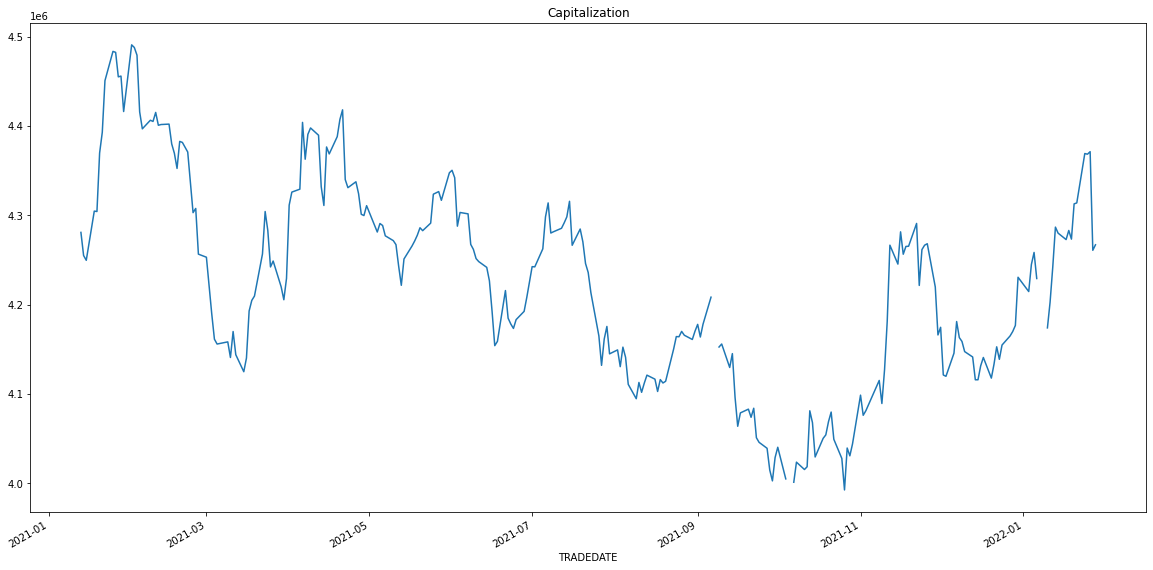

In [34]:
cap = prices.dot(portfolio.loc[:,'amount'])
cap.plot(title = 'Capitalization')

<AxesSubplot:title={'center':'returns'}, xlabel='TRADEDATE'>

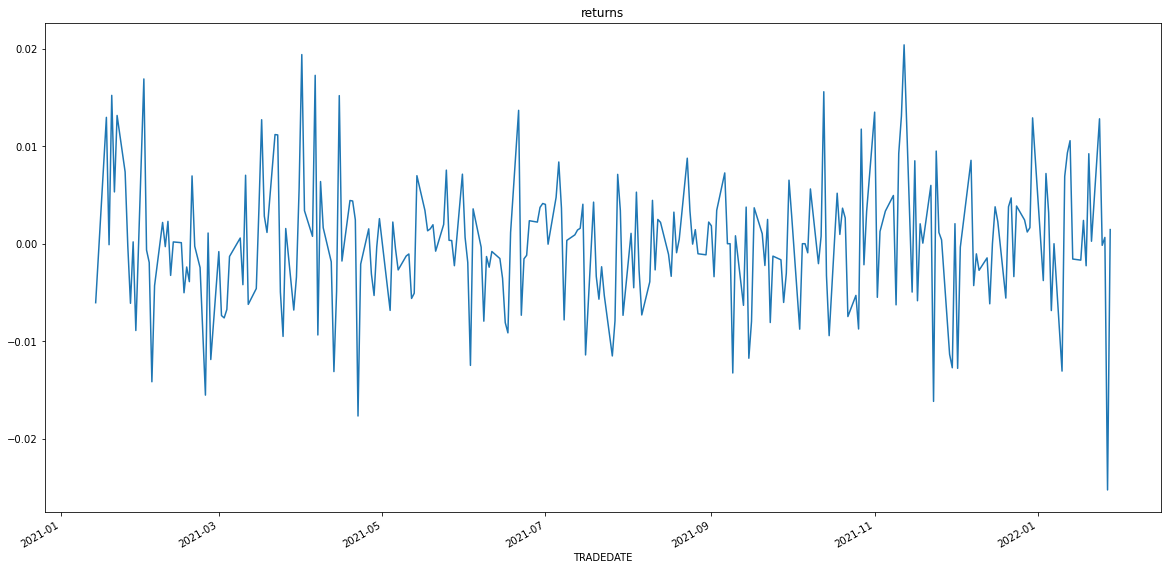

In [35]:
returns = cap.pct_change()
returns.plot(title = 'returns')

<AxesSubplot:title={'center':'returns KDE'}, ylabel='Density'>

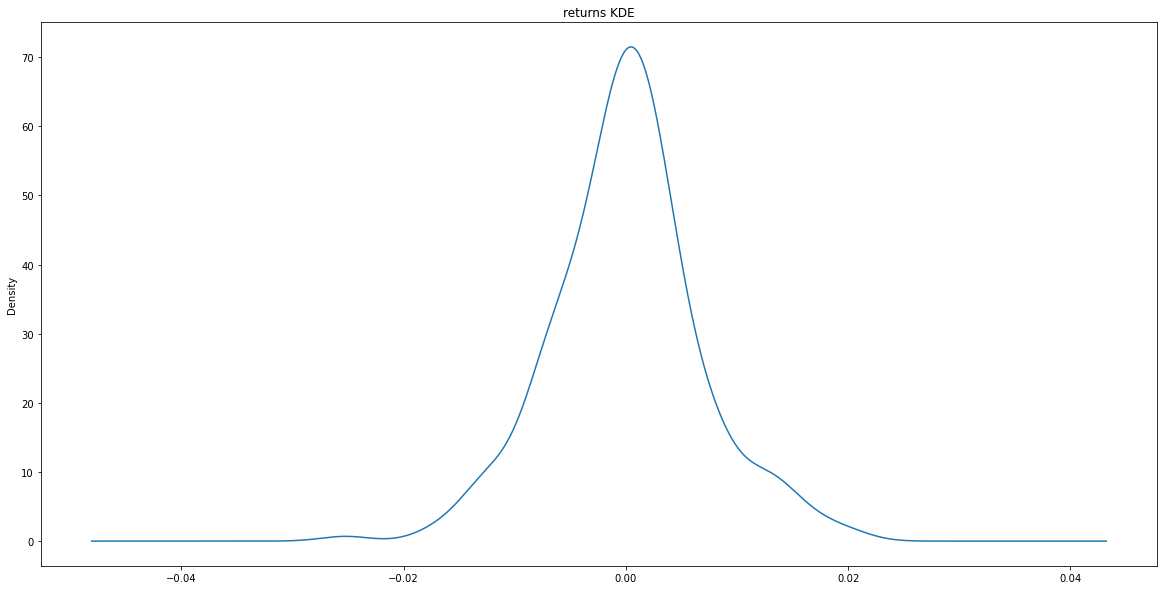

In [36]:
returns.plot.kde(title = 'returns KDE')

In [37]:
returns

TRADEDATE
2021-01-13         NaN
2021-01-14   -0.006049
2021-01-15   -0.001258
2021-01-18    0.012958
2021-01-19   -0.000104
                ...   
2022-01-24    0.012811
2022-01-25   -0.000168
2022-01-26    0.000644
2022-01-27   -0.025254
2022-01-28    0.001448
Length: 269, dtype: float64

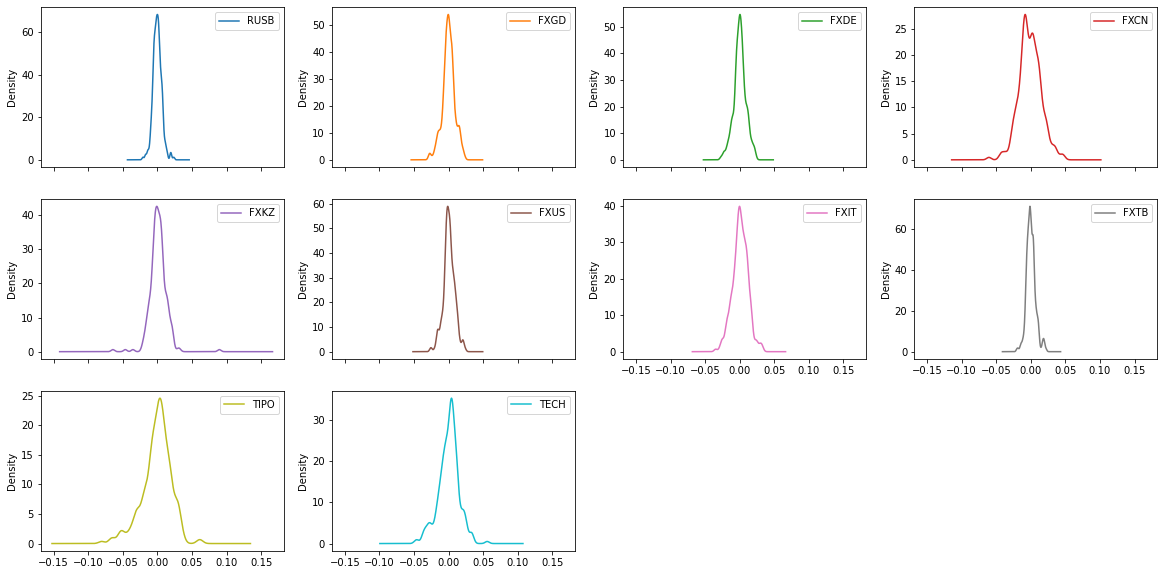

In [46]:
prices.pct_change().plot.kde(figsize = (20,10), subplots = True, layout = (3,4), bw_method=0.2)
plt.show()